In [58]:
#loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [59]:
#loading dataset
df = pd.read_csv(r"C:\Users\bharathi.v04\Downloads\heart.csv")

In [60]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [61]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [62]:
df.shape  #checking total rows and columsn in dataset

(918, 12)

In [63]:
df.info()  #getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 86.1+ KB


In [64]:
#getting statistical info
df.describe(())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [65]:
#finding the null values in dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Data Visualization

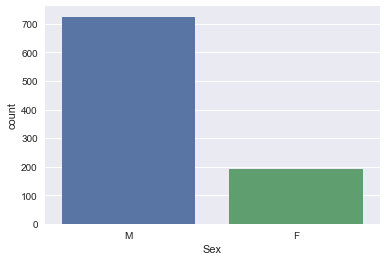

In [66]:
sns.set()
sns.countplot(df['Sex'])

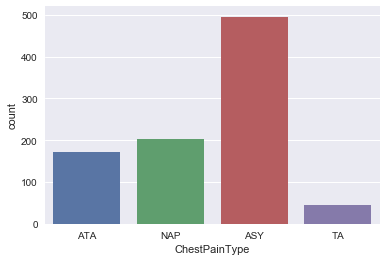

In [67]:
sns.countplot(df['ChestPainType'])

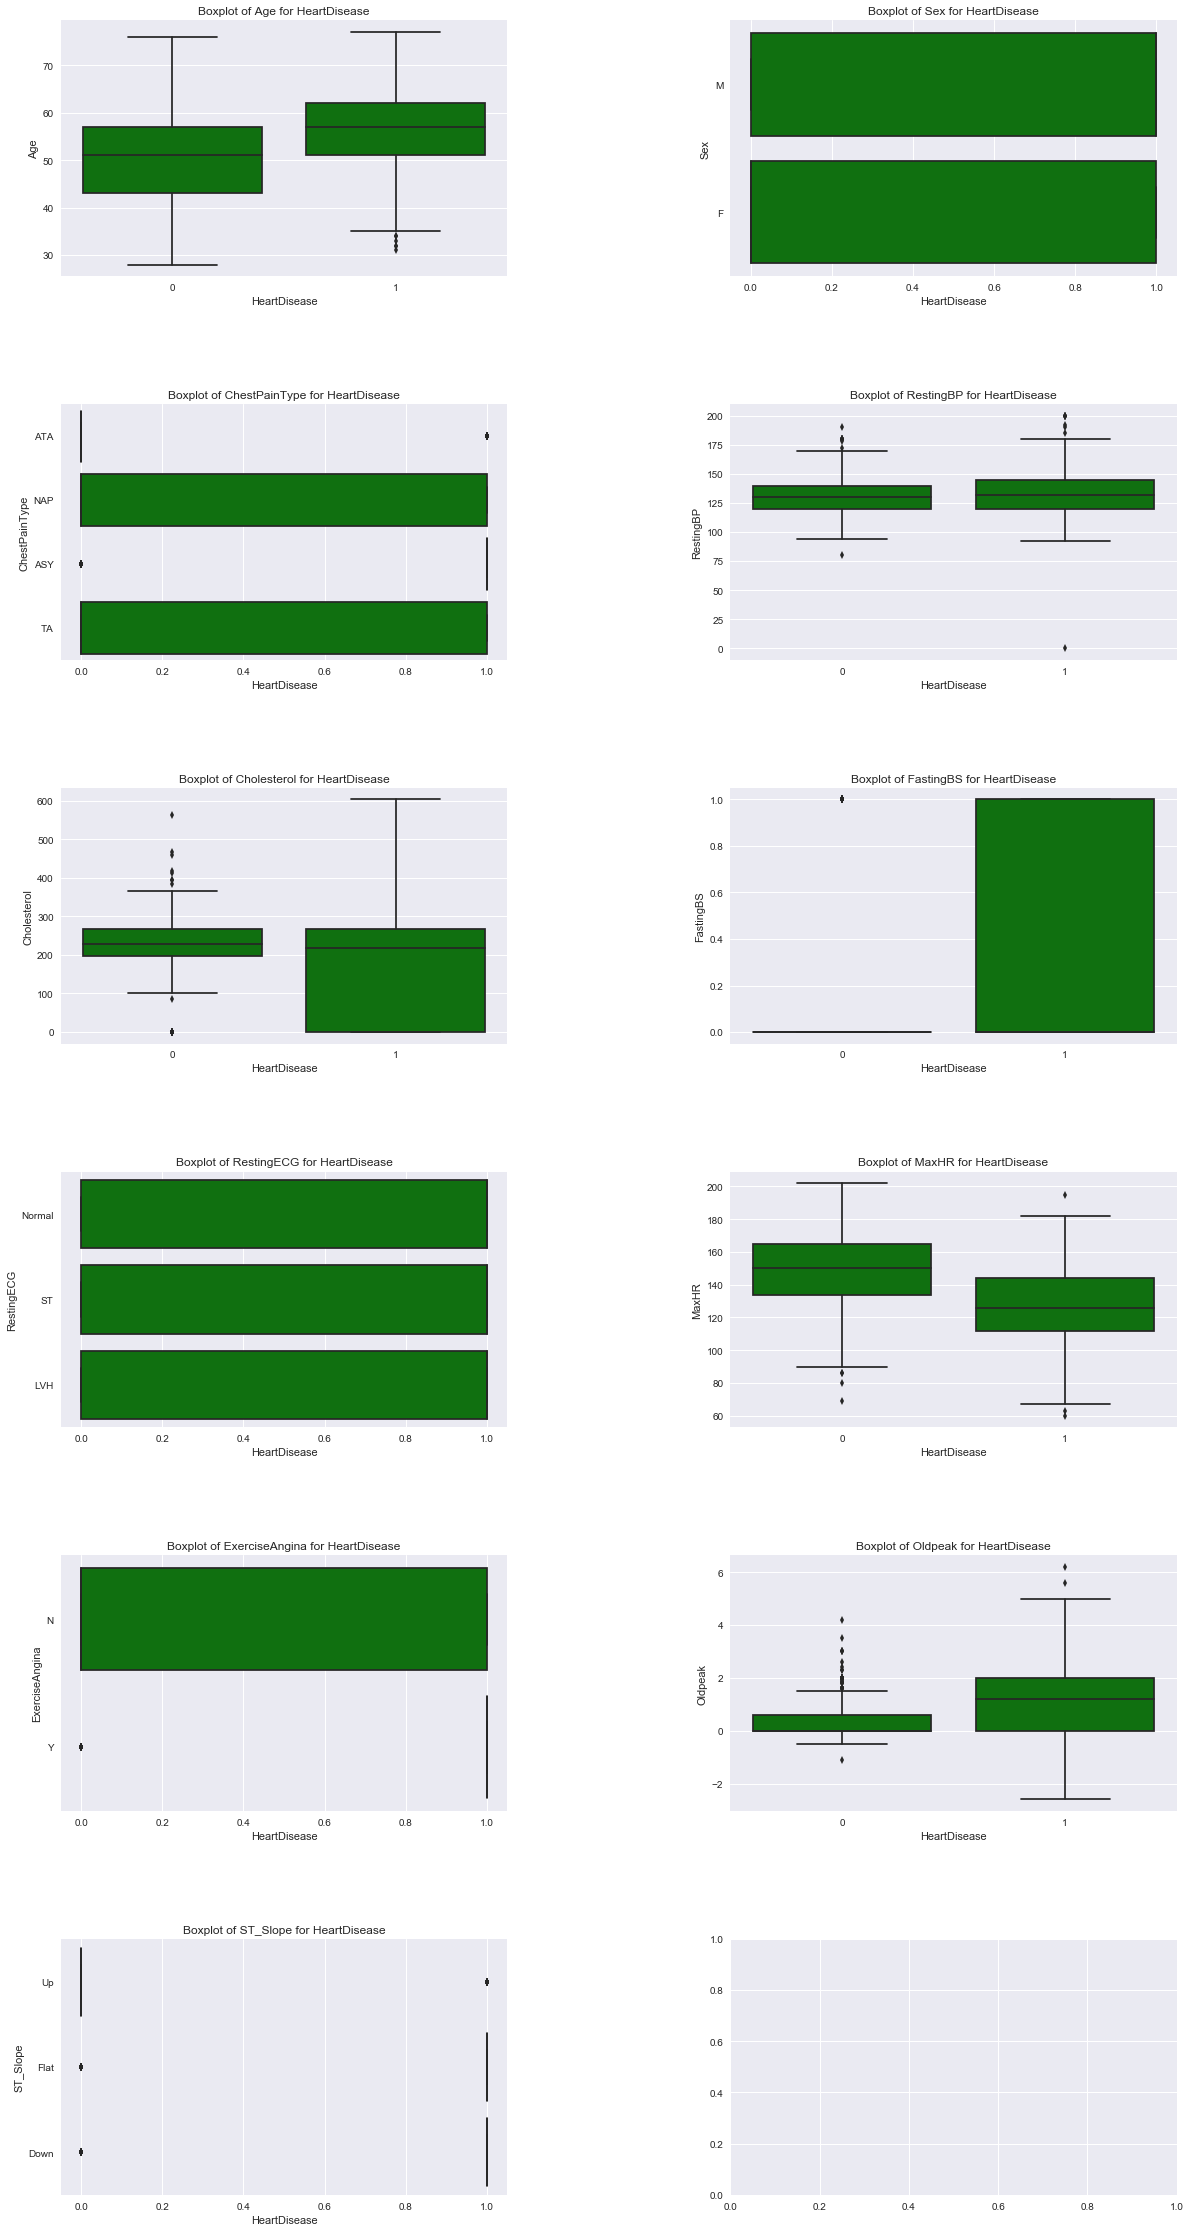

In [68]:
fig,axes=plt.subplots(nrows=6,ncols=2,figsize=(20,40))
for nr, c in enumerate(df.columns):
    if c!='HeartDisease':
        sns.boxplot(data=df,x='HeartDisease',y=c,ax=axes[nr//2,nr%2],color='Green')
        axes[nr //2, nr% 2].set_title('Boxplot of '+c+' for HeartDisease')
        
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

In [69]:
df.replace({"Sex":{"Male":0,"female":1}},inplace=True)

In [72]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


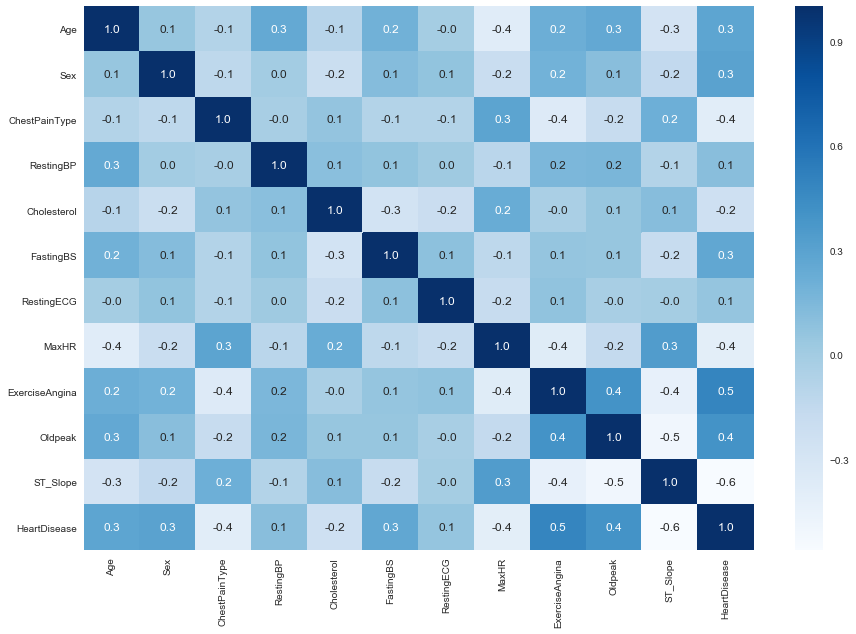

In [73]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,fmt='.1f',annot=True,cmap='Blues')

In [74]:
X = df.drop(columns='HeartDisease',axis=1)
Y = df['HeartDisease']

In [75]:
print(X)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
5     39    1              2        120          339          0           1   
6     45    0              1        130          237          0           1   
7     54    1              1        110          208          0           1   
8     37    1              0        140          207          0           1   
9     48    0              1        120          284          0           1   
10    37    0              2        130          211          0           1   
11    58    1              1        136          164

print(Y)

#### Splitting into train test and split

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [78]:
print(X.shape,X_train.shape,X_test.shape)

(918, 11) (734, 11) (184, 11)


##### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
print(X_train)

[[-0.35508576 -1.94868818 -0.82059666 ... -0.84081909 -0.82297207
  -0.57689739]
 [-2.04339633  0.51316573  0.21967613 ... -0.84081909 -0.82297207
   1.09019979]
 [ 0.80562776  0.51316573 -0.82059666 ...  1.18931648  0.7585843
  -0.57689739]
 ...
 [-0.24956635  0.51316573  1.25994893 ...  1.18931648  0.7585843
  -0.57689739]
 [ 0.80562776  0.51316573  0.21967613 ... -0.84081909 -0.54387389
   1.09019979]
 [ 0.48906953  0.51316573 -0.82059666 ... -0.84081909 -0.82297207
   1.09019979]]


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
# Prediction on training dataset
from sklearn.metrics import accuracy_score
prediction_on_training_data = model.predict(X_train)
accuracy_score_training = accuracy_score(prediction_on_training_data,Y_train)

In [86]:
print("The accuracy score on training data is : ",accuracy_score_training)

The accuracy score on training data is :  0.8596730245231607


In [87]:
# Prediction on test dataset
prediction_on_test_data = model.predict(X_test)
accuracy_score_test = accuracy_score(prediction_on_test_data,Y_test)

In [88]:
print("The accuracy score on test data is : ",accuracy_score_test)

The accuracy score on test data is :  0.842391304347826


In [89]:
from sklearn.ensemble import AdaBoostClassifier

In [92]:
model1 = AdaBoostClassifier()

In [93]:
model1.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [94]:
prediction_on_training_data = model1.predict(X_train)
accuracy_score_training = accuracy_score(prediction_on_training_data,Y_train)

In [95]:
print("The accuracy score on training data on model1 : ",accuracy_score_training)

The accuracy score on training data on model1 :  0.8978201634877384


In [96]:
prediction_on_test_data = model1.predict(X_test)
accuracy_score_test = accuracy_score(prediction_on_test_data,Y_test)

In [97]:
print("The accuracy score on test data on model1 : ",accuracy_score_test)

The accuracy score on test data on model1 :  0.8641304347826086


In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
model2 = GradientBoostingClassifier()

In [100]:
model2.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [101]:
prediction_on_training_data = model2.predict(X_train)
accuracy_score_training = accuracy_score(prediction_on_training_data,Y_train)

In [102]:
print("The accuracy score on training data on model2 : ",accuracy_score_training)

The accuracy score on training data on model2 :  0.9495912806539509


In [103]:
prediction_on_test_data = model2.predict(X_test)
accuracy_score_test = accuracy_score(prediction_on_test_data,Y_test)

In [104]:
print("The accuracy score on test data on model2 : ",accuracy_score_test)

The accuracy score on test data on model2 :  0.8586956521739131


In [ ]:
acc = pd.DataFrame({
    "algorithms": ['Adaboost', 'Xgboost'],
    "accuracy": [accuracy_score(Y_test, y_pred_adaboost),accuracy_score(Y_test, y_pred_xgboost)]
})
sns.barplot(x='accuracy', y='algorithms', data=acc, palette='rocket')